In [4]:
import pandas as pd
import cv2
import os 
from pathlib import Path 
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [5]:
p = Path("./Dataset1/")

dirs = p.glob("*")

image_data = []
labels = []
image_paths = []
label_dict = {"Arcanine":0,"Squirtle":1,"Pikachu":2,"Raichu":3,"Bulbasaur":4}
label2pokemon = {0:"Arcanine",1:"Squirtle",2:"Pikachu",3:"Raichu",4:"Bulbasaur"} #Reverse mapping

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1]
    
    cnt = 0
    print(label)
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        
        labels.append(label_dict[label])
        cnt += 1
    
    print(cnt)

.DS_Store
0
Arcanine
61
Squirtle
186
Pikachu
199
Raichu
71
Bulbasaur
174


In [43]:
x = np.array(image_data)
y = np.array(labels)

print(x.shape)
print(y.shape)

(691, 40, 40, 3)
(691,)


In [44]:
from sklearn.utils import shuffle
x,y = shuffle(x,y,random_state=2)

x = x/255.0

In [45]:
from sklearn.model_selection import train_test_split
x,x_,y,y_ = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
print(x.shape)
print(y.shape)
print(x_.shape)
print(y_.shape)

(552, 40, 40, 3)
(552,)
(139, 40, 40, 3)
(139,)


In [47]:
y_train = y
y_test = y_
y = np_utils.to_categorical(y)
y_ = np_utils.to_categorical(y_)

In [48]:
print(y.shape)
print(y_.shape)
print(y_train.shape)
print(y_test.shape)

(552, 5)
(139, 5)
(552,)
(139,)


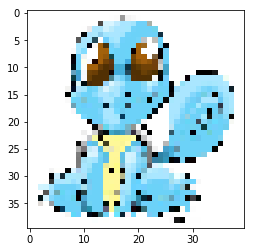

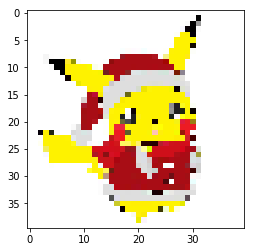

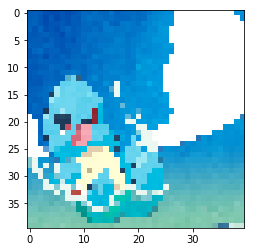

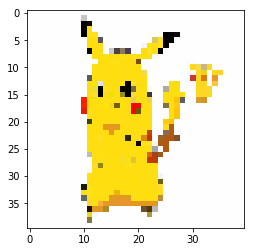

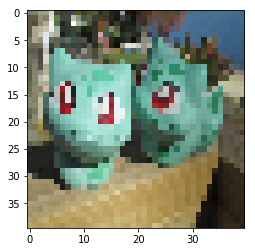

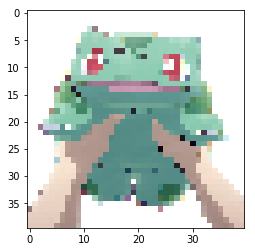

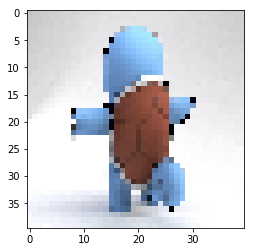

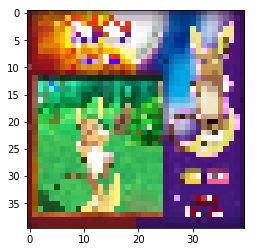

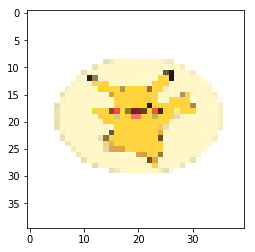

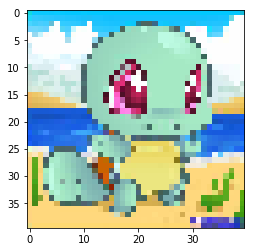

In [14]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(x[ix],cmap='gray')
    plt.show()

## CNN MODEL

In [54]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape=(40,40,3)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation = 'relu'))
model.add(Convolution2D(8,(5,5),activation = 'relu'))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 38, 38, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 36, 36, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        51232     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 8)         6408      
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
__________

In [55]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.fit?

In [56]:
hist = model.fit(x,y,epochs=20,shuffle=True,validation_split=0.20)

Train on 441 samples, validate on 111 samples
Epoch 1/20
441/441 [==============================] - 6s 13ms/step - loss: 1.4296 - acc: 0.4127 - val_loss: 1.1360 - val_acc: 0.5045
Epoch 2/20
441/441 [==============================] - 4s 10ms/step - loss: 0.9976 - acc: 0.5578 - val_loss: 1.0223 - val_acc: 0.5676
Epoch 3/20
441/441 [==============================] - 4s 10ms/step - loss: 0.9496 - acc: 0.6122 - val_loss: 0.9627 - val_acc: 0.7027
Epoch 4/20
441/441 [==============================] - 4s 10ms/step - loss: 0.8530 - acc: 0.6712 - val_loss: 0.8440 - val_acc: 0.6667
Epoch 5/20
441/441 [==============================] - 4s 10ms/step - loss: 0.8006 - acc: 0.7256 - val_loss: 0.7695 - val_acc: 0.6757
Epoch 6/20
441/441 [==============================] - 4s 10ms/step - loss: 0.6969 - acc: 0.7732 - val_loss: 0.9366 - val_acc: 0.6306
Epoch 7/20
441/441 [==============================] - 4s 9ms/step - loss: 0.6893 - acc: 0.7596 - val_loss: 0.6724 - val_acc: 0.7387
Epoch 8/20
441/441 [====

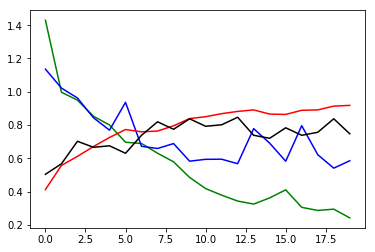

In [57]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')

plt.show()

In [58]:
yp_train = model.predict(x)
yp_train.shape

(552, 5)

In [59]:
yp_train = yp_train.argmax(axis=-1)

In [60]:
print(yp_train.shape)

(552,)


In [61]:
train_acc = np.sum(yp_train==y_train)/y_train.shape[0]
print(train_acc)

0.9094202898550725


In [62]:
yp_test = model.predict(x_)
yp_test.shape

(139, 5)

In [63]:
yp_test = yp_test.argmax(axis=-1)

In [64]:
print(yp_train.shape)

(552,)


In [65]:
test_acc = np.sum(yp_test==y_test)/y_test.shape[0]
print(test_acc)

0.7913669064748201
